In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Reading DAta from MNIST Dataset
df = pd.read_csv('train.csv')
data = df.values
print(data.shape)

(42000, 785)


In [3]:
##Saving image Data
x = data[:,1:]
#Saving Number Correspoding to the number
y = data[:,0]





In [4]:
##Function to visualize the image
##Not Required

def draw(x):
    image=x.reshape((28,28))
    plt.imshow(image,cmap='gray')

In [5]:
#Giving 80% of Data for Training and Rest for Testing 

split = int(0.8 *x.shape[0])
x_train = x[:split,:]
y_train = y[:split]
print(x_train.shape)
print(y_train.shape)

(33600, 784)
(33600,)


#K-Nearest Neighbours


In [6]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())



def knn(x_train,y_train,query_x,k=5):
    dist_vals=[]
    
    m = x_train.shape[0]
    
    for ix in range(m):
        d=dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))
    
    dist_vals = sorted(dist_vals)
    dist_vals=dist_vals[:k]
    
    y=np.array(dist_vals)
    t=np.unique(y[:,1],return_counts=True)
    index = t[1].argmax()
    prediction  = t[0][index]
    return prediction
    

In [7]:
query_x = x_train[67]
pred = knn(x_train,y_train,query_x)

8
8


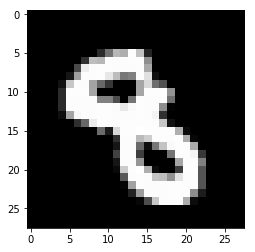

In [8]:
#Algorithm prediction
print(int(pred))
#Display Image at the 67th Position
draw(query_x)
#Actual Answer Stored in Dataset at 67th Poistion
print(y_train[67])


#Testing Efficiency

In [9]:
#Taking the 20% of Data for Testing

In [10]:
x_test = x[split:,:]
y_test = y[split:]
print(x_test.shape)
print(y_test.shape)

(8400, 784)
(8400,)


In [16]:
#Testing for First 100 sets in test[]

cnt = 0
n = 100

for ix in range(n):
    pred = knn(x_train,y_train,x_test[ix])
    if(int(pred)==y_test[ix]):
        cnt+=1
print((cnt*100)/n)

96
